/Users/antoinegourgue/Desktop/Projects/medical-ai-detection/venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(



📊 Analyse TRAIN :
📂 NORMAL: 1341 images
📂 PNEUMONIA: 3875 images
➡️ NORMAL représente 25.71% du dataset.
➡️ PNEUMONIA représente 74.29% du dataset.


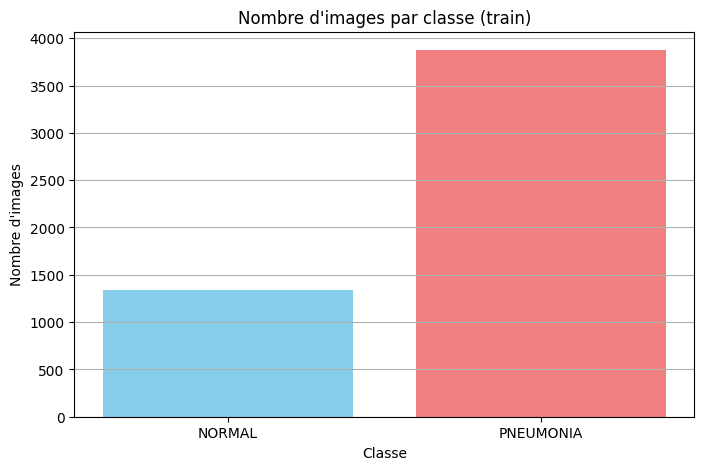


📊 Analyse TEST :
📂 NORMAL: 234 images
📂 PNEUMONIA: 390 images
➡️ NORMAL représente 37.50% du dataset.
➡️ PNEUMONIA représente 62.50% du dataset.


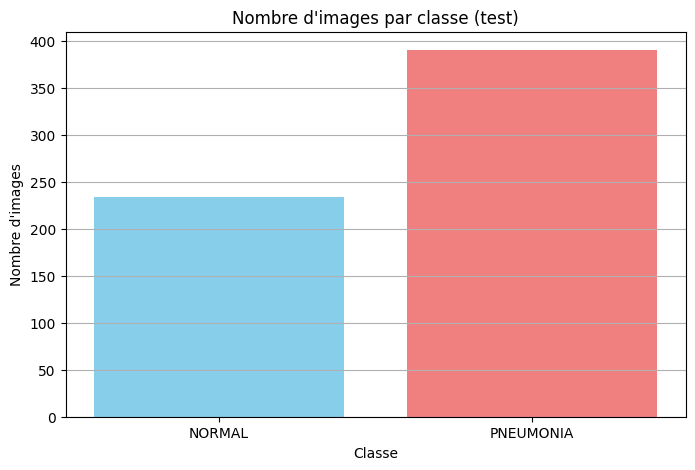


📊 Analyse VAL :
📂 NORMAL: 8 images
📂 PNEUMONIA: 8 images
➡️ NORMAL représente 50.00% du dataset.
➡️ PNEUMONIA représente 50.00% du dataset.


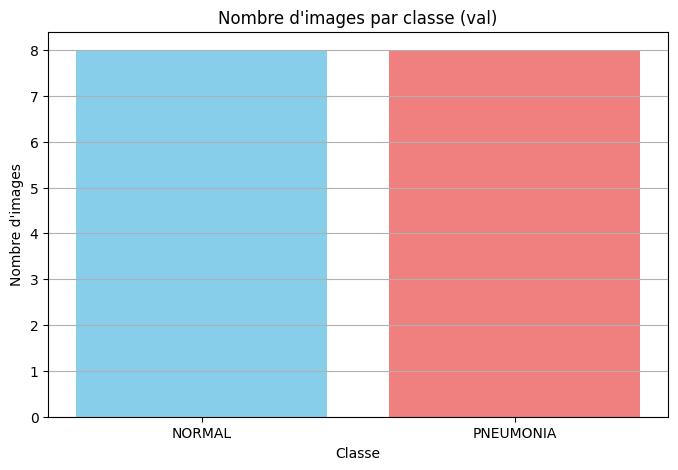


🔎 Analyse du dataset TRAIN AVANT équilibrage :
   - NORMAL: 1341 images (25.71%)
   - PNEUMONIA: 3875 images (74.29%)

⚖️ Train : équilibrage forcé à 1341 images par classe.


Loading TRAIN - PNEUMONIA: 100%|██████████| 1341/1341 [00:01<00:00, 712.59it/s]



✅ Dataset TRAIN chargé : 2682 images
📊 Détail APRÈS équilibrage :
   - NORMAL: 1341 images
   - PNEUMONIA: 1341 images

🔎 Analyse du dataset TEST AVANT équilibrage :
   - NORMAL: 234 images (37.50%)
   - PNEUMONIA: 390 images (62.50%)

⚖️ Test : équilibrage à 234 images par classe (test/val équilibré doucement).


Loading TEST - PNEUMONIA: 100%|██████████| 234/234 [00:00<00:00, 801.11it/s]



✅ Dataset TEST chargé : 468 images
📊 Détail APRÈS équilibrage :
   - NORMAL: 234 images
   - PNEUMONIA: 234 images

🔎 Analyse du dataset VAL AVANT équilibrage :
   - NORMAL: 8 images (50.00%)
   - PNEUMONIA: 8 images (50.00%)

⚖️ Val : équilibrage à 8 images par classe (test/val équilibré doucement).


Loading VAL - PNEUMONIA: 100%|██████████| 8/8 [00:00<00:00, 706.90it/s]



✅ Dataset VAL chargé : 16 images
📊 Détail APRÈS équilibrage :
   - NORMAL: 8 images
   - PNEUMONIA: 8 images

🎯 Résumé final après équilibrage :
- Train : 1341 NORMAL / 1341 PNEUMONIA
- Test  : 234 NORMAL / 234 PNEUMONIA
- Val   : 8 NORMAL / 8 PNEUMONIA


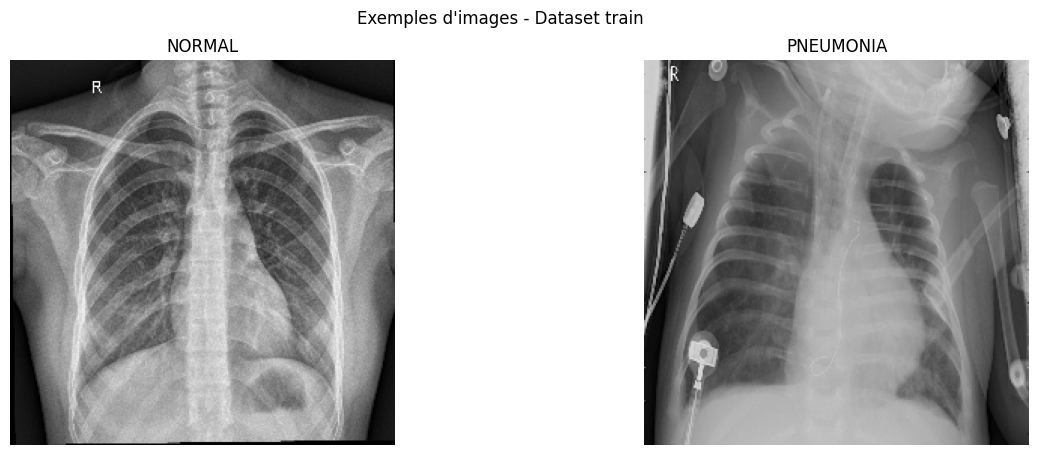

In [3]:
import os
import random
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tqdm import tqdm

IMG_SIZE = (256, 256)
categories = ["NORMAL", "PNEUMONIA"]

def analyze_dataset(dataset_path, categories=["NORMAL", "PNEUMONIA"], show_plot=True):
    stats = {}
    for category in categories:
        path = os.path.join(dataset_path, category)
        num_images = len(os.listdir(path))
        stats[category] = num_images
        print(f"📂 {category}: {num_images} images")

    total = sum(stats.values())
    for category in categories:
        pourcentage = (stats[category] / total) * 100
        print(f"➡️ {category} représente {pourcentage:.2f}% du dataset.")

    if show_plot:
        plt.figure(figsize=(8, 5))
        plt.bar(stats.keys(), stats.values(), color=['skyblue', 'lightcoral'])
        plt.title(f"Nombre d'images par classe ({os.path.basename(dataset_path)})")
        plt.xlabel("Classe")
        plt.ylabel("Nombre d'images")
        plt.grid(axis="y")
        plt.show()

    return stats

def load_images_and_labels(dataset_path, balance_classes=True, max_images_per_class=None, set_name="train"):
    X, Y = [], []
    images_by_category = {}

    for category in categories:
        path = os.path.join(dataset_path, category)
        images = os.listdir(path)
        images_by_category[category] = images

    print(f"\n🔎 Analyse du dataset {set_name.upper()} AVANT équilibrage :")
    stats_before = {cat: len(imgs) for cat, imgs in images_by_category.items()}
    total = sum(stats_before.values())
    for cat, count in stats_before.items():
        print(f"   - {cat}: {count} images ({(count/total)*100:.2f}%)")

    if balance_classes:
        if set_name == "train":
            min_images = min(len(imgs) for imgs in images_by_category.values())
            if max_images_per_class:
                min_images = min(min_images, max_images_per_class)
            print(f"\n⚖️ Train : équilibrage forcé à {min_images} images par classe.")
        else:
            min_images = min(len(imgs) for imgs in images_by_category.values())
            print(f"\n⚖️ {set_name.capitalize()} : équilibrage à {min_images} images par classe (test/val équilibré doucement).")
    else:
        min_images = None

    counts_after = {cat: 0 for cat in categories}

    for category in categories:
        path = os.path.join(dataset_path, category)
        label = 0 if category == "NORMAL" else 1
        images = images_by_category[category]

        if min_images:
            images = random.sample(images, min_images)

        for img_name in tqdm(images, desc=f"Loading {set_name.upper()} - {category}"):
            img_path = os.path.join(path, img_name)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            if img is not None:
                img = cv2.resize(img, IMG_SIZE)
                img = np.expand_dims(img, axis=-1)
                X.append(img)
                Y.append(label)
                counts_after[category] += 1

    X = np.array(X) / 255.0
    Y = np.array(Y)

    print(f"\n✅ Dataset {set_name.upper()} chargé : {X.shape[0]} images")
    print("📊 Détail APRÈS équilibrage :")
    for cat in categories:
        print(f"   - {cat}: {counts_after[cat]} images")

    return X, Y, counts_after

DATASET_PATH = "/Users/antoinegourgue/Desktop/Projects/medical-ai-detection/data/chest_xray"

print("\n📊 Analyse TRAIN :")
train_stats = analyze_dataset(os.path.join(DATASET_PATH, "train"))

print("\n📊 Analyse TEST :")
test_stats = analyze_dataset(os.path.join(DATASET_PATH, "test"))

val_path = os.path.join(DATASET_PATH, "val")
val_exists = os.path.exists(val_path)
if val_exists:
    print("\n📊 Analyse VAL :")
    val_stats = analyze_dataset(val_path)
else:
    print("\n⚠️ Aucun dossier VAL trouvé, skip.")

X_train, Y_train, train_counts = load_images_and_labels(os.path.join(DATASET_PATH, "train"), balance_classes=True, set_name="train")
X_test, Y_test, test_counts = load_images_and_labels(os.path.join(DATASET_PATH, "test"), balance_classes=True, set_name="test")

if val_exists:
    X_val, Y_val, val_counts = load_images_and_labels(val_path, balance_classes=True, set_name="val")
else:
    val_counts = None

print("\n🎯 Résumé final après équilibrage :")
print(f"- Train : {train_counts['NORMAL']} NORMAL / {train_counts['PNEUMONIA']} PNEUMONIA")
print(f"- Test  : {test_counts['NORMAL']} NORMAL / {test_counts['PNEUMONIA']} PNEUMONIA")
if val_counts:
    print(f"- Val   : {val_counts['NORMAL']} NORMAL / {val_counts['PNEUMONIA']} PNEUMONIA")

fig, axes = plt.subplots(1, len(categories), figsize=(15, 5))

for i, category in enumerate(categories):
    path = os.path.join(DATASET_PATH, "train", category)
    img_name = os.listdir(path)[0]
    img = cv2.imread(os.path.join(path, img_name), cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, IMG_SIZE)
    axes[i].imshow(img, cmap='gray')
    axes[i].set_title(category)
    axes[i].axis("off")

plt.suptitle("Exemples d'images - Dataset train")
plt.show()



📊 Vérification des tailles des données après chargement :
X_train shape: (5216, 64, 64)
Y_train shape: (5216,)
X_test shape: (624, 64, 64)
Y_test shape: (624,)
X_train_knn shape après reshape: (5216, 4096)
Fitting 5 folds for each of 80 candidates, totalling 400 fits

🔍 Meilleurs paramètres trouvés : {'knn__metric': 'manhattan', 'knn__n_neighbors': 7, 'knn__weights': 'uniform', 'pca__n_components': 50}

✅ Accuracy du modèle KNN : 0.7724

📊 Rapport de classification :
               precision    recall  f1-score   support

           0       0.94      0.42      0.58       234
           1       0.74      0.98      0.84       390

    accuracy                           0.77       624
   macro avg       0.84      0.70      0.71       624
weighted avg       0.81      0.77      0.74       624



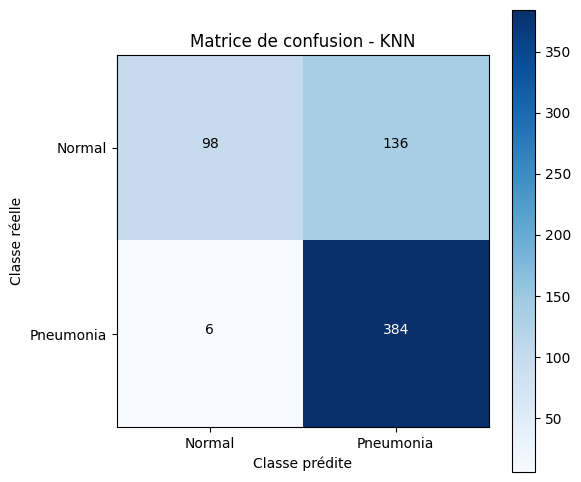

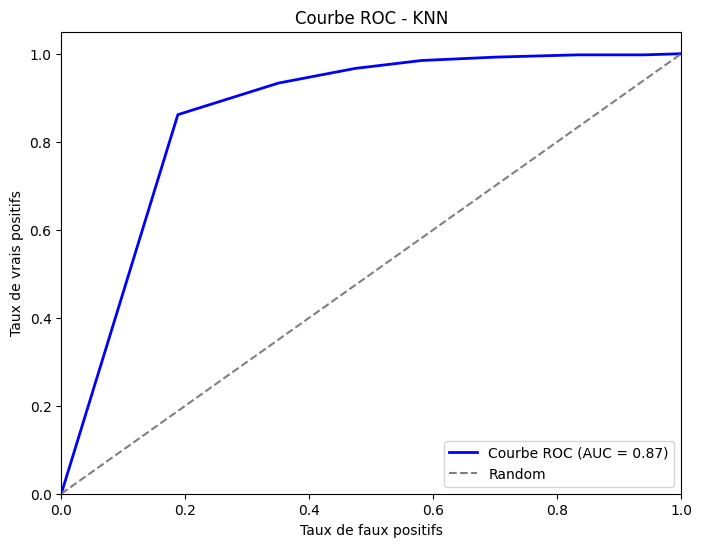

In [2]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

X_train = np.load("/Users/antoinegourgue/Desktop/Projects/medical-ai-detection/data/X_train.npy")
Y_train = np.load("/Users/antoinegourgue/Desktop/Projects/medical-ai-detection/data/Y_train.npy")
X_test = np.load("/Users/antoinegourgue/Desktop/Projects/medical-ai-detection/data/X_test.npy")
Y_test = np.load("/Users/antoinegourgue/Desktop/Projects/medical-ai-detection/data/Y_test.npy")

print("\n📊 Vérification des tailles des données après chargement :")
print(f"X_train shape: {X_train.shape}")
print(f"Y_train shape: {Y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"Y_test shape: {Y_test.shape}")

Y_train = Y_train.ravel()
Y_test = Y_test.ravel()

if X_train.shape[0] != Y_train.shape[0] or X_test.shape[0] != Y_test.shape[0]:
    raise ValueError("❌ Erreur : Incohérence entre le nombre d'images et de labels.")

X_train_knn = X_train.reshape(X_train.shape[0], -1)
X_test_knn = X_test.reshape(X_test.shape[0], -1)
print(f"X_train_knn shape après reshape: {X_train_knn.shape}")

scaler = StandardScaler()
X_train_knn = scaler.fit_transform(X_train_knn)
X_test_knn = scaler.transform(X_test_knn)

pipeline = Pipeline([
    ('pca', PCA()),
    ('knn', KNeighborsClassifier(n_jobs=-1))
])

param_grid = {
    'pca__n_components': [50, 100, 150, 200, 250],
    'knn__n_neighbors': [3, 5, 7, 9],
    'knn__metric': ['euclidean', 'manhattan'],
    'knn__weights': ['uniform', 'distance']
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='balanced_accuracy', verbose=1)
grid_search.fit(X_train_knn, Y_train)
print("\n🔍 Meilleurs paramètres trouvés :", grid_search.best_params_)

best_pipeline = grid_search.best_estimator_
Y_pred_knn = best_pipeline.predict(X_test_knn)
accuracy = accuracy_score(Y_test, Y_pred_knn)

print(f"\n✅ Accuracy du modèle KNN : {accuracy:.4f}")
print("\n📊 Rapport de classification :\n", classification_report(Y_test, Y_pred_knn))

cm = confusion_matrix(Y_test, Y_pred_knn)
plt.figure(figsize=(6, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Matrice de confusion - KNN")
plt.colorbar()
tick_marks = range(2)
plt.xticks(tick_marks, ['Normal', 'Pneumonia'])
plt.yticks(tick_marks, ['Normal', 'Pneumonia'])

thresh = cm.max() / 2.0
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.xlabel("Classe prédite")
plt.ylabel("Classe réelle")
plt.show()


Y_pred_proba = best_pipeline.predict_proba(X_test_knn)[:, 1]
fpr, tpr, thresholds = roc_curve(Y_test, Y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="blue", lw=2, label=f"Courbe ROC (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="gray", linestyle="--", label="Random")
plt.xlabel("Taux de faux positifs")
plt.ylabel("Taux de vrais positifs")
plt.title("Courbe ROC - KNN")
plt.legend(loc="lower right")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.show()


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.regularizers import l2
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

X_train = np.load("/Users/antoinegourgue/Desktop/Projects/medical-ai-detection/data/X_train.npy")
Y_train = np.load("/Users/antoinegourgue/Desktop/Projects/medical-ai-detection/data/Y_train.npy")
X_test = np.load("/Users/antoinegourgue/Desktop/Projects/medical-ai-detection/data/X_test.npy")
Y_test = np.load("/Users/antoinegourgue/Desktop/Projects/medical-ai-detection/data/Y_test.npy")

print(f"🔍 X_train: {X_train.shape}, Y_train: {Y_train.shape}")
print(f"🔍 X_test: {X_test.shape}, Y_test: {Y_test.shape}")

IMG_SIZE = (256, 256)
X_train_resized = np.array([tf.image.resize(np.expand_dims(img, -1), IMG_SIZE).numpy() for img in X_train])
X_test_resized = np.array([tf.image.resize(np.expand_dims(img, -1), IMG_SIZE).numpy() for img in X_test])

X_train_resized = X_train_resized.astype('float32') / 255.0
X_test_resized = X_test_resized.astype('float32') / 255.0

classes = np.unique(Y_train)
class_weights = compute_class_weight(class_weight='balanced', classes=classes, y=Y_train)
class_weights_dict = dict(zip(classes, class_weights))
print(f"⚖️ Poids des classes : {class_weights_dict}")

datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True
)
datagen.fit(X_train_resized)

model = models.Sequential([
    layers.Input(shape=(256, 256, 1)),
    layers.Conv2D(32, (3, 3), activation='relu', kernel_regularizer=l2(0.001)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(0.001)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu', kernel_regularizer=l2(0.001)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(256, (3, 3), activation='relu', kernel_regularizer=l2(0.001)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),


    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.00002),
              loss='binary_crossentropy',
              metrics=['accuracy'])

callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, verbose=1, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1),
    ModelCheckpoint("models/best_cnn_model_128.keras", monitor='val_loss', save_best_only=True, verbose=1)
]

history = model.fit(datagen.flow(X_train_resized, Y_train, batch_size=32),
                    epochs=10,
                    validation_data=(X_test_resized, Y_test),
                    class_weight=class_weights_dict,
                    callbacks=callbacks)

Y_pred_prob = model.predict(X_test_resized)
Y_pred = (Y_pred_prob > 0.5).astype("int32")
accuracy = np.mean(Y_pred.flatten() == Y_test)

print(f"\n✅ Accuracy du modèle CNN : {accuracy:.4f}")
print("\n📊 Rapport de classification :\n", classification_report(Y_test, Y_pred))

cm = confusion_matrix(Y_test, Y_pred)
plt.figure(figsize=(6, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Matrice de confusion - CNN (256x256)")
plt.colorbar()
tick_marks = range(2)
plt.xticks(tick_marks, ['Normal', 'Pneumonia'])
plt.yticks(tick_marks, ['Normal', 'Pneumonia'])

thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.xlabel("Classe prédite")
plt.ylabel("Classe réelle")
plt.show()

fpr, tpr, thresholds = roc_curve(Y_test, Y_pred_prob)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="blue", lw=2, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="gray", linestyle="--", label="Aléatoire")
plt.xlabel("Taux de faux positifs")
plt.ylabel("Taux de vrais positifs")
plt.title("Courbe ROC - CNN (256x256)")
plt.legend(loc="lower right")
plt.show()

model.save("models/cnn_256_V3.keras")

🔍 X_train: (5216, 64, 64), Y_train: (5216,)
🔍 X_test: (624, 64, 64), Y_test: (624,)
⚖️ Poids des classes : {np.int64(0): np.float64(1.9448173005219984), np.int64(1): np.float64(0.6730322580645162)}
Epoch 1/10


/Users/antoinegourgue/Library/Python/3.9/lib/python/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 565ms/step - accuracy: 0.7658 - loss: 0.8595  
Epoch 1: val_loss improved from inf to 1.01599, saving model to models/best_cnn_model_128.keras
163/163 ━━━━━━━━━━━━━━━━━━━━ 96s 580ms/step - accuracy: 0.7661 - loss: 0.8588 - val_accuracy: 0.6250 - val_loss: 1.0160 - learning_rate: 2.0000e-05
Epoch 2/10
  8/163 ━━━━━━━━━━━━━━━━━━━━ 1:29 579ms/step - accuracy: 0.8070 - loss: 0.7502

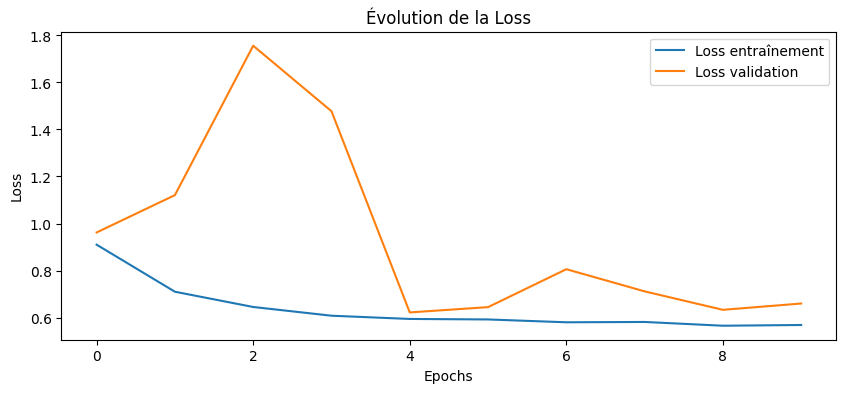

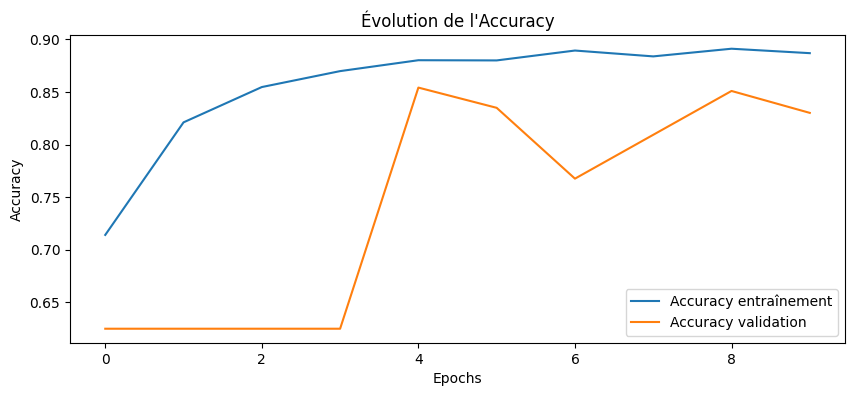

In [2]:
import matplotlib.pyplot as plt

history_dict = history.history

plt.figure(figsize=(10, 4))
plt.plot(history_dict['loss'], label='Loss entraînement')
plt.plot(history_dict['val_loss'], label='Loss validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title("Évolution de la Loss")
plt.show()

plt.figure(figsize=(10, 4))
plt.plot(history_dict['accuracy'], label='Accuracy entraînement')
plt.plot(history_dict['val_accuracy'], label='Accuracy validation')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title("Évolution de l'Accuracy")
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
🔍 Prédiction : NORMAL (Probabilité: 0.0000)


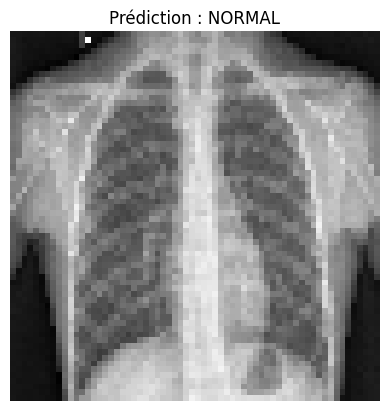

In [3]:
import cv2
import os

def predict_image(image_path):
    IMG_SIZE = (64, 64)
    
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        print("❌ Erreur : Impossible de charger l'image.")
        return
    
    img = cv2.resize(img, IMG_SIZE)
    img = img / 255.0
    img = img.reshape(1, 64, 64, 1)

    prediction = model.predict(img)[0][0]
    label = "PNEUMONIA" if prediction > 0.5 else "NORMAL"

    print(f"🔍 Prédiction : {label} (Probabilité: {prediction:.4f})")

    plt.imshow(img.reshape(64, 64), cmap='gray')
    plt.title(f"Prédiction : {label}")
    plt.axis("off")
    plt.show()

test_image_path = "../data/chest_xray/test/NORMAL/IM-0001-0001.jpeg"
if os.path.exists(test_image_path):
    predict_image(test_image_path)
else:
    print("❌ L'image test spécifiée n'existe pas. Vérifie le chemin.")
